<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/financial-investment-doc/blob/main/Stock_Market_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr



# For time stamps
from datetime import datetime

import yfinance as yf
from datetime import datetime


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

AAPL = yf.download('AAPL', start, end)
GOOG = yf.download('GOOG', start, end)
MSFT = yf.download('MSFT', start, end)
AMZN = yf.download('AMZN', start, end)

print("AAPL Data:\n", AAPL.head())
print("\nGOOG Data:\n", GOOG.head())
print("\nMSFT Data:\n", MSFT.head())
print("\nAMZN Data:\n", AMZN.head())

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

dataframes = []
company_list = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock, company_list in zip(tech_list, company_list):
    stock_df = yf.download(stock, start, end)
    stock_df["company_list"] = company_list
    dataframes.append(stock_df)

company = pd.concat(dataframes, axis=0)

print(company.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AAPL Data:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-17  177.139999  177.509995  173.479996  174.000000  173.114166   
2023-08-18  172.300003  175.100006  171.960007  174.490005  173.601685   
2023-08-21  175.070007  176.130005  173.740005  175.839996  174.944778   
2023-08-22  177.059998  177.679993  176.250000  177.229996  176.327698   
2023-08-23  178.520004  181.550003  178.330002  181.119995  180.197906   

              Volume  
Date                  
2023-08-17  66062900  
2023-08-18  61114200  
2023-08-21  46311900  
2023-08-22  42084200  
2023-08-23  52722800  

GOOG Data:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-17  130.449997  132.490997  129.850006  130.460007  130.311722   
2023-08-18  129.059998  129.830002  127.000000  128.110001  127.964386   

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-05  154.210007  162.960007  151.610001  161.020004  161.020004   
2024-08-06  161.710007  165.080002  158.539993  161.929993  161.929993   
2024-08-07  166.550003  167.580002  161.429993  162.770004  162.770004   
2024-08-08  165.169998  166.690002  162.550003  165.800003  165.800003   
2024-08-09  166.399994  168.550003  165.850006  166.940002  166.940002   
2024-08-12  168.139999  168.550003  166.110001  166.800003  166.800003   
2024-08-13  167.809998  171.039993  167.100006  170.229996  170.229996   
2024-08-14  172.110001  172.279999  168.860001  170.100006  170.100006   
2024-08-15  174.860001  177.910004  173.990005  177.589996  177.589996   
2024-08-16  177.110001  178.339996  176.260101  177.059998  177.059998   

              Volume company_list  
Date                               
2024-08-05  83149400       AMAZON  
202

In [20]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,188.444762,190.230029,186.863373,188.637659,188.078959,6.043588e+07
std,16.923635,17.232208,16.561195,16.937698,17.079300,2.477635e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.599743,4.672095e+07
50%,185.165001,186.655006,183.519997,185.349998,184.717117,5.377700e+07
75%,194.315002,195.350002,193.049999,194.195000,193.592892,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-17 to 2024-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


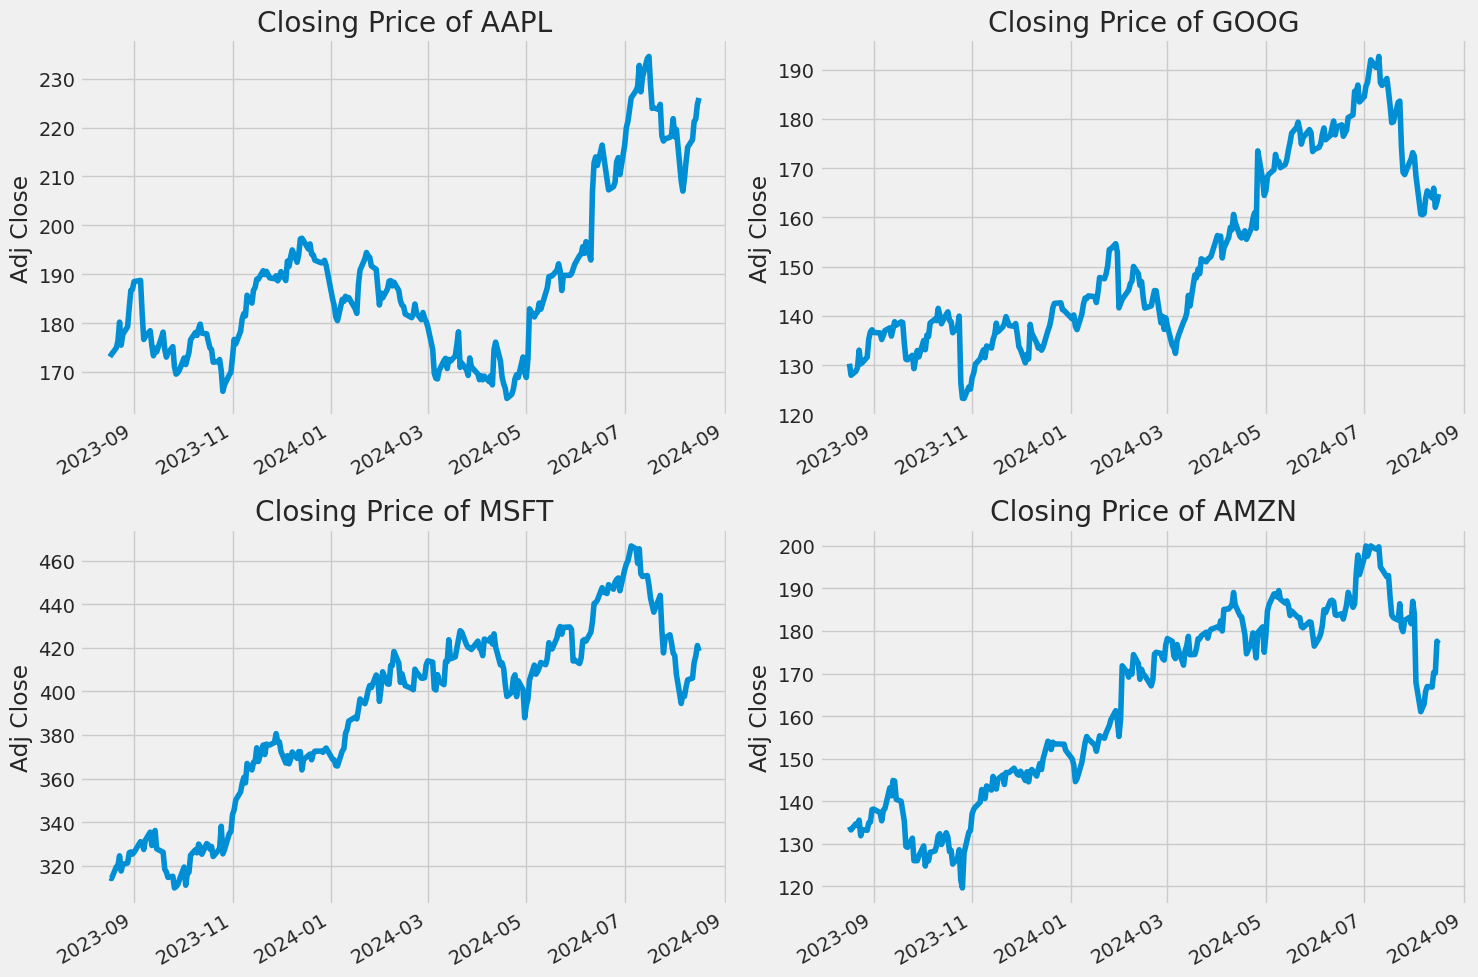

In [31]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dataframes, 1):
    plt.subplot(2, 2, i)
    df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

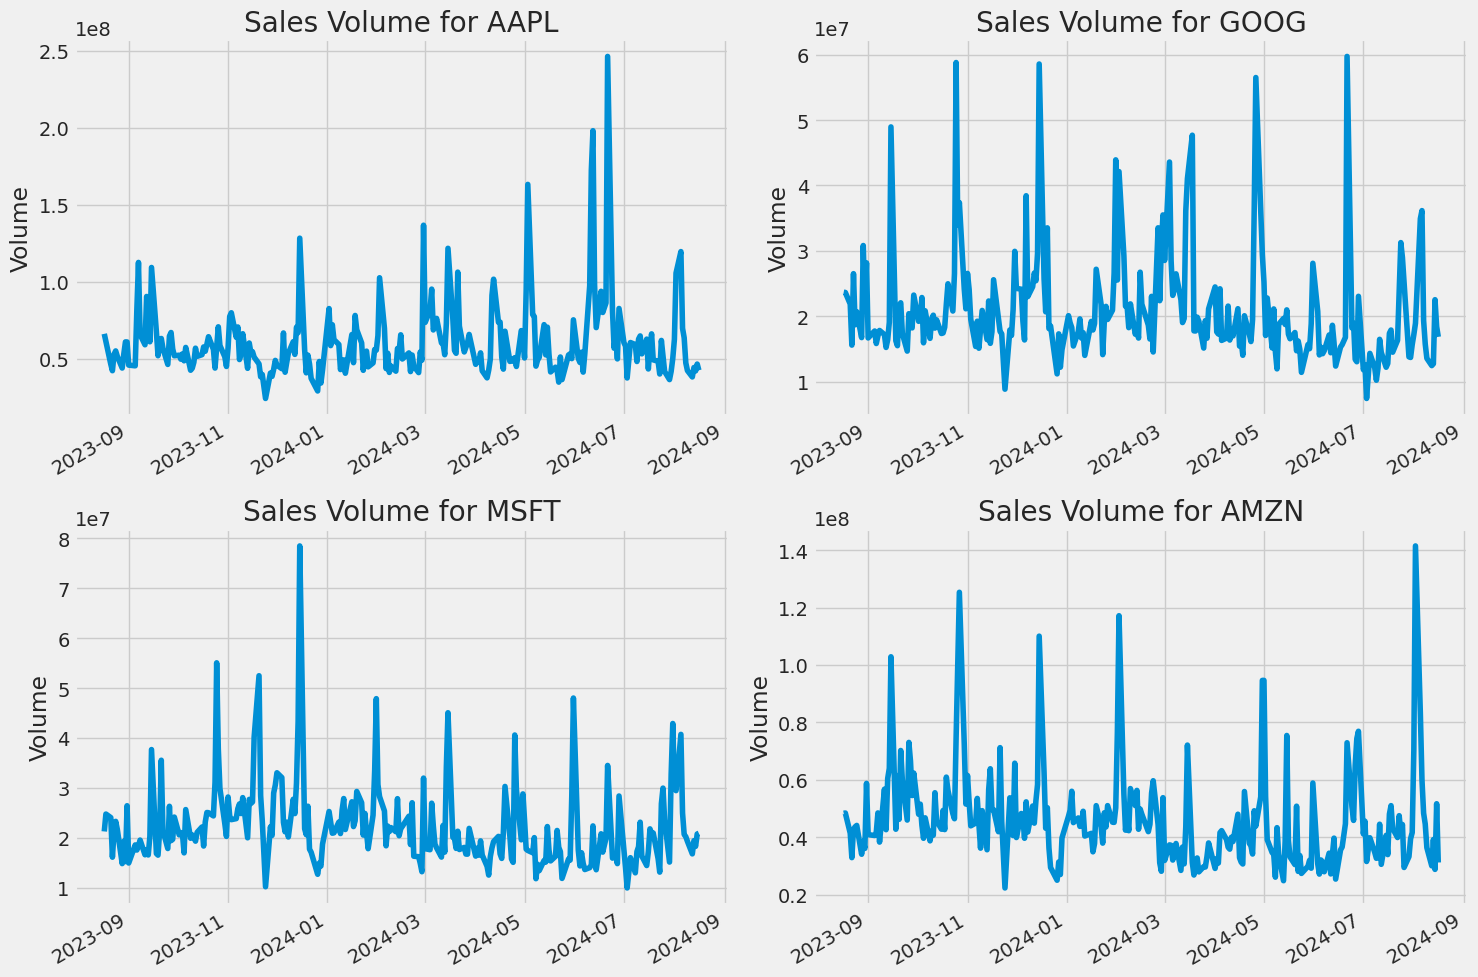

In [33]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dataframes, 1):
    plt.subplot(2, 2, i)
    df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

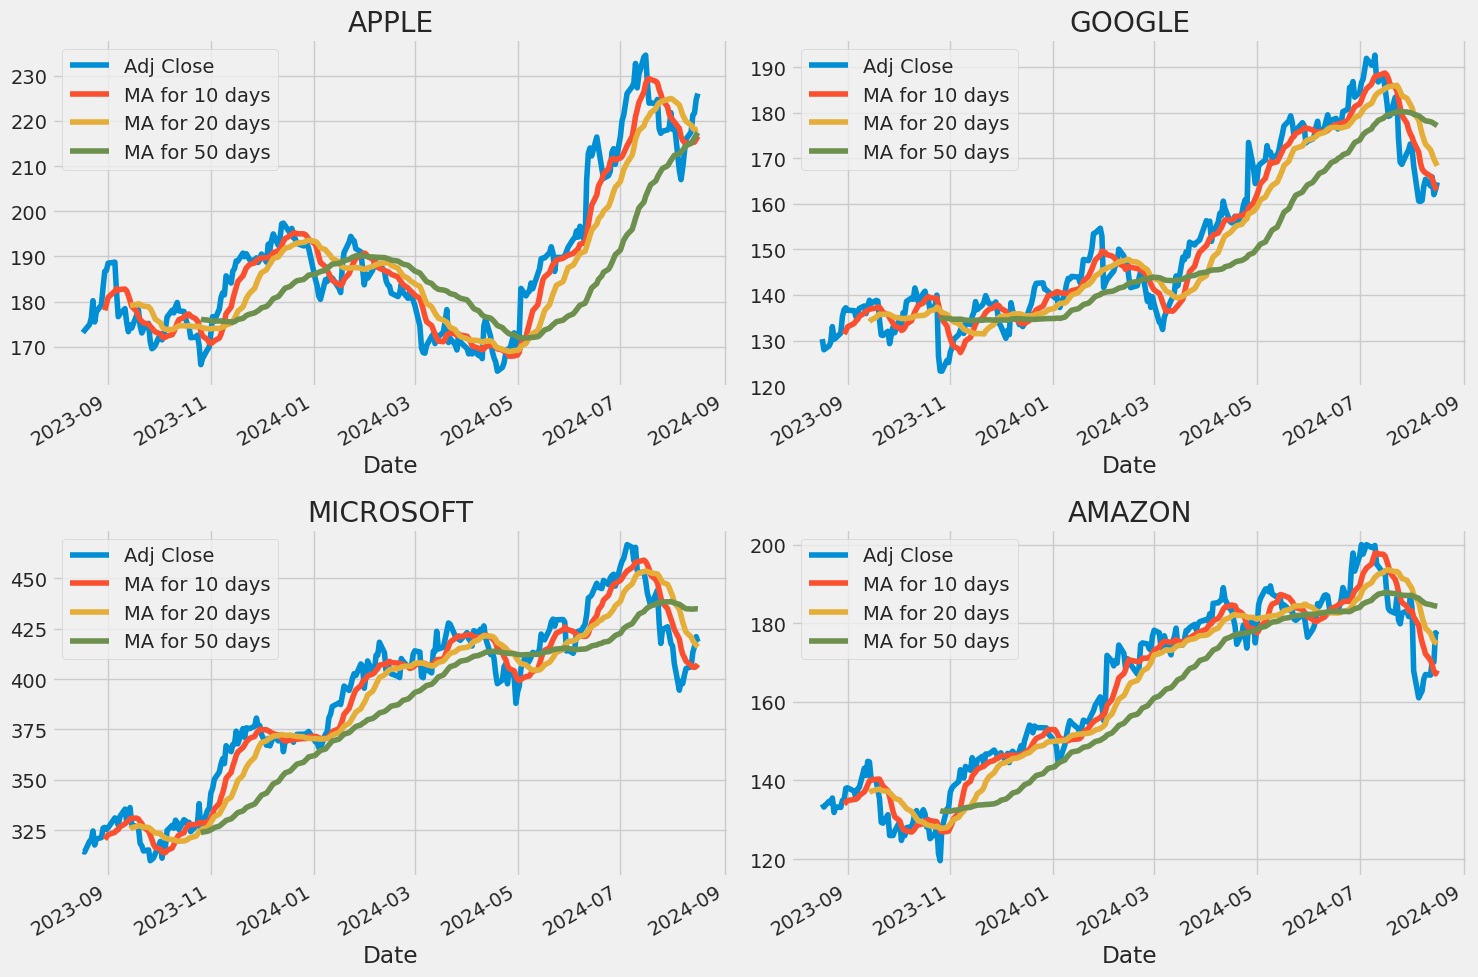

In [39]:
ma_day = [10, 20, 50]

company_list = [AAPL, GOOG, MSFT, AMZN]

for ma in ma_day:
    for company_df in company_list:
        column_name = f"MA for {ma} days"
        company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

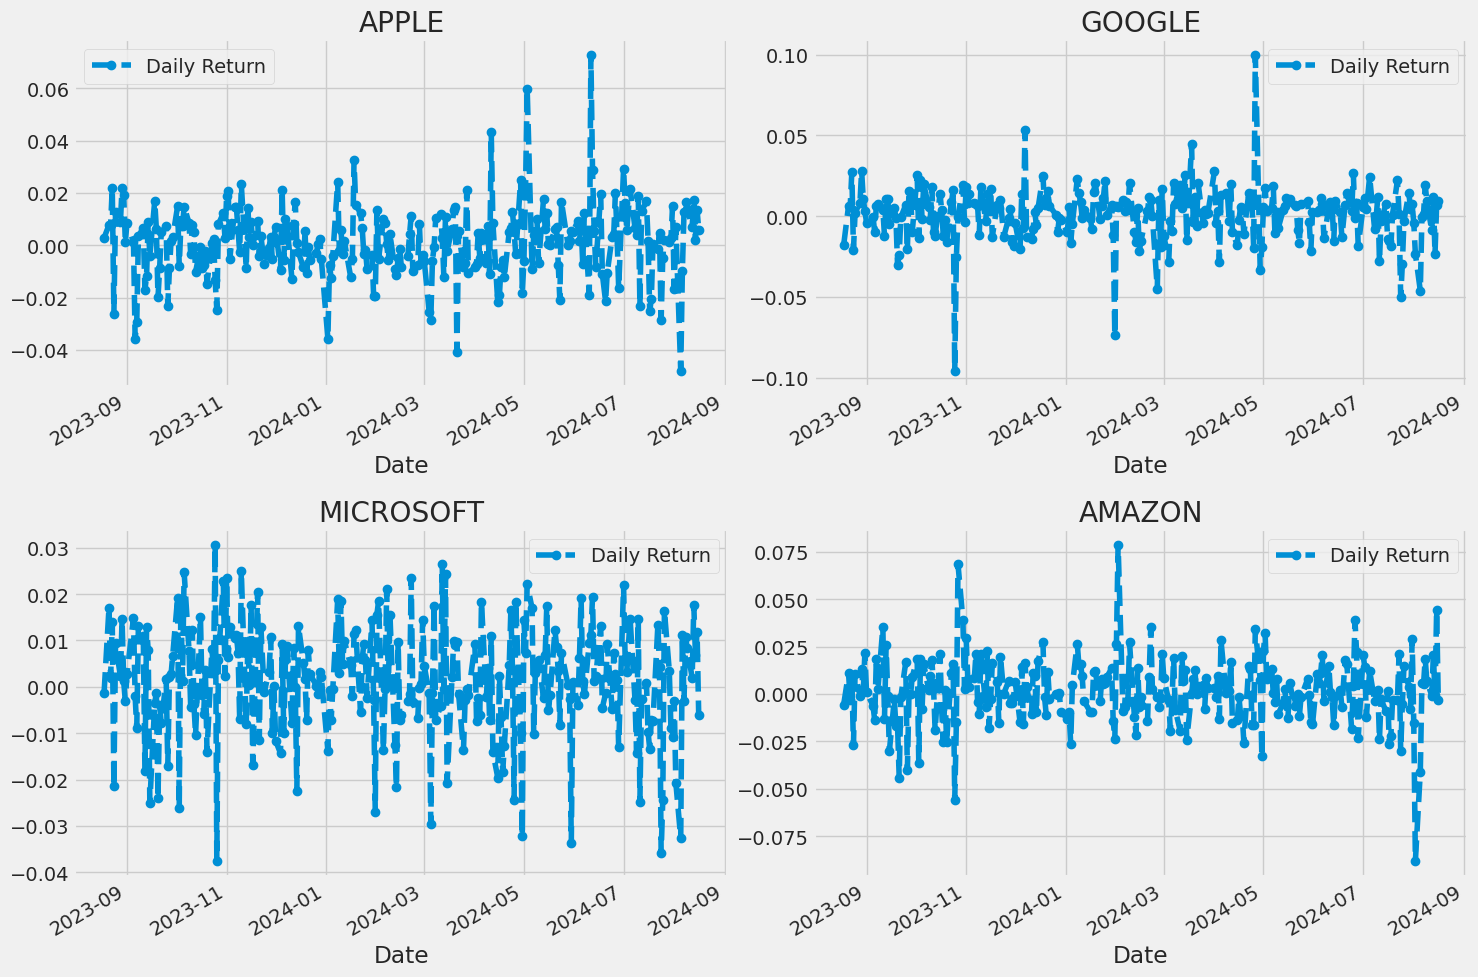

In [40]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

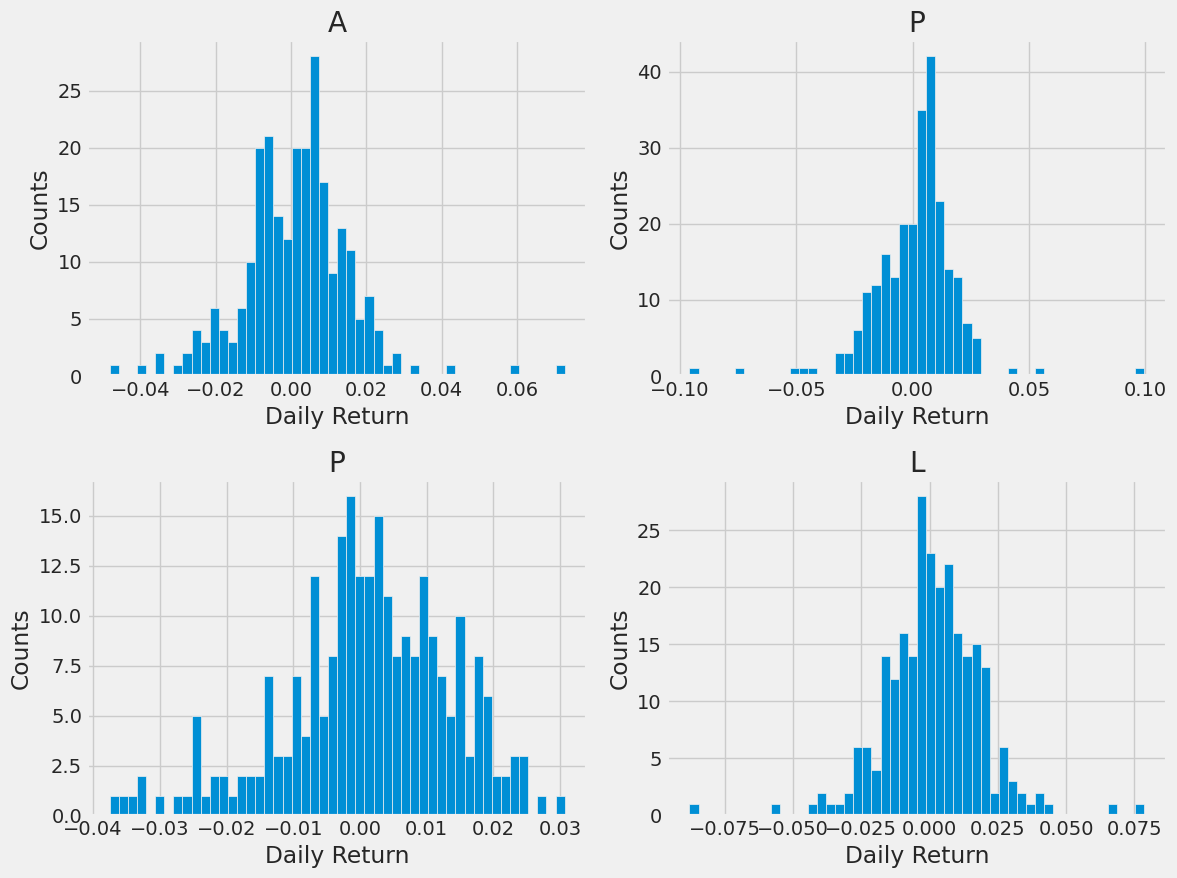

In [41]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [43]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# Assuming tech_list, start, and end are defined elsewhere
# Example:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = '2022-01-01'
end = '2023-01-01'

# Use yfinance to fetch data
data = yf.download(tech_list, start=start, end=end)

# Extract adjusted closing prices
closing_df = data['Adj Close']

# Calculate daily returns
tech_rets = closing_df.pct_change()

print(tech_rets.head())

[*********************100%%**********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2022-01-03       NaN       NaN       NaN       NaN
2022-01-04 -0.012692 -0.016916 -0.004536 -0.017147
2022-01-05 -0.026600 -0.018893 -0.046830 -0.038388
2022-01-06 -0.016693 -0.006711 -0.000745 -0.007902
2022-01-07  0.000988 -0.004288 -0.003973  0.000510


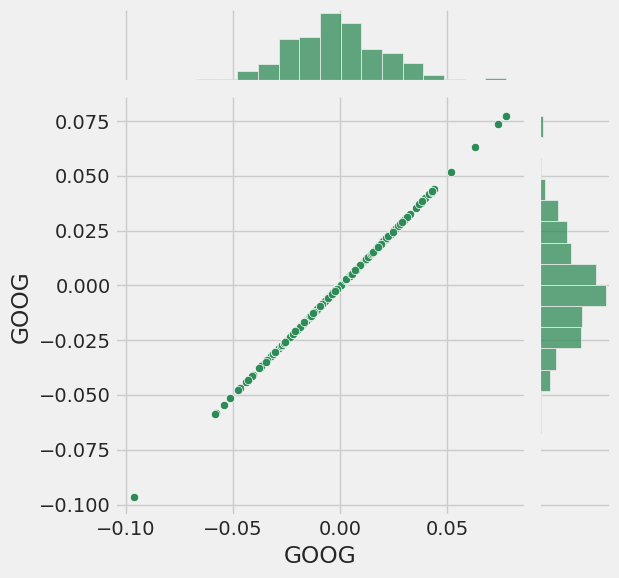

In [44]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

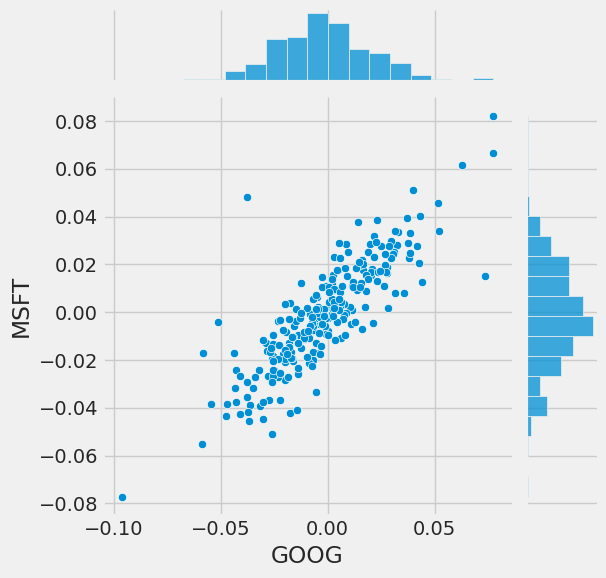

In [45]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

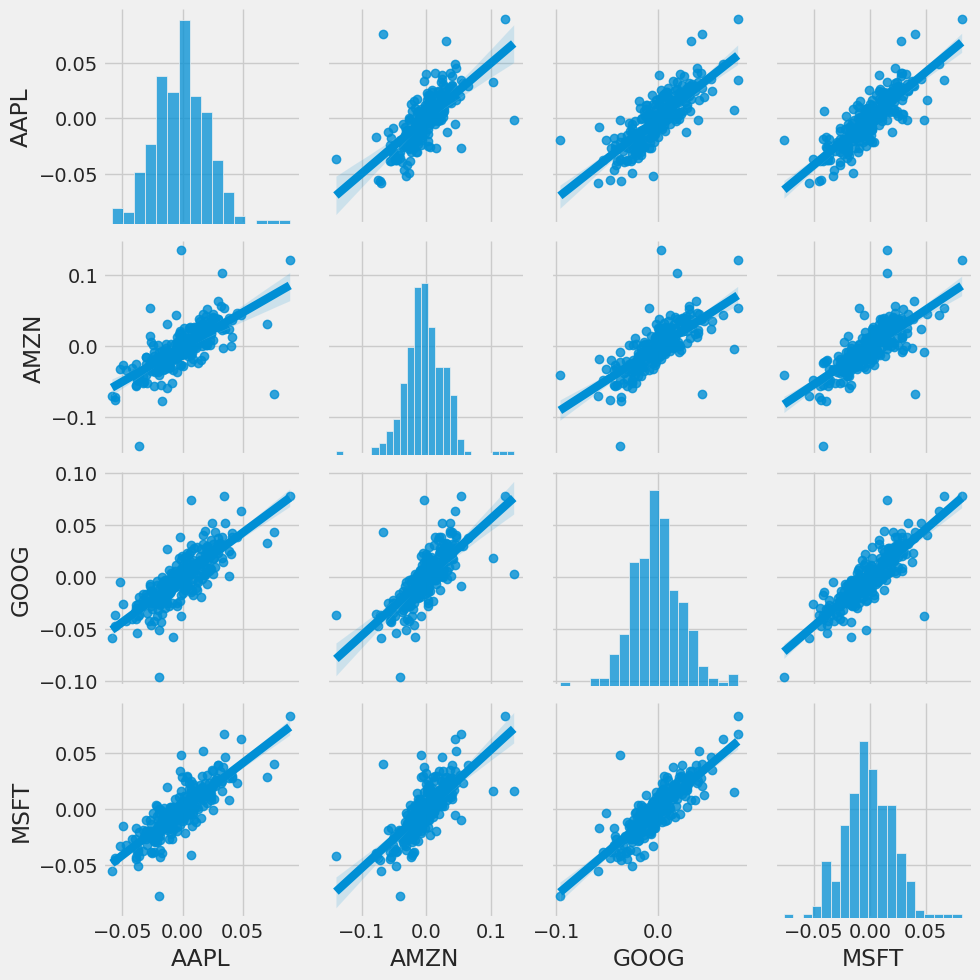

In [46]:
sns.pairplot(tech_rets, kind='reg')

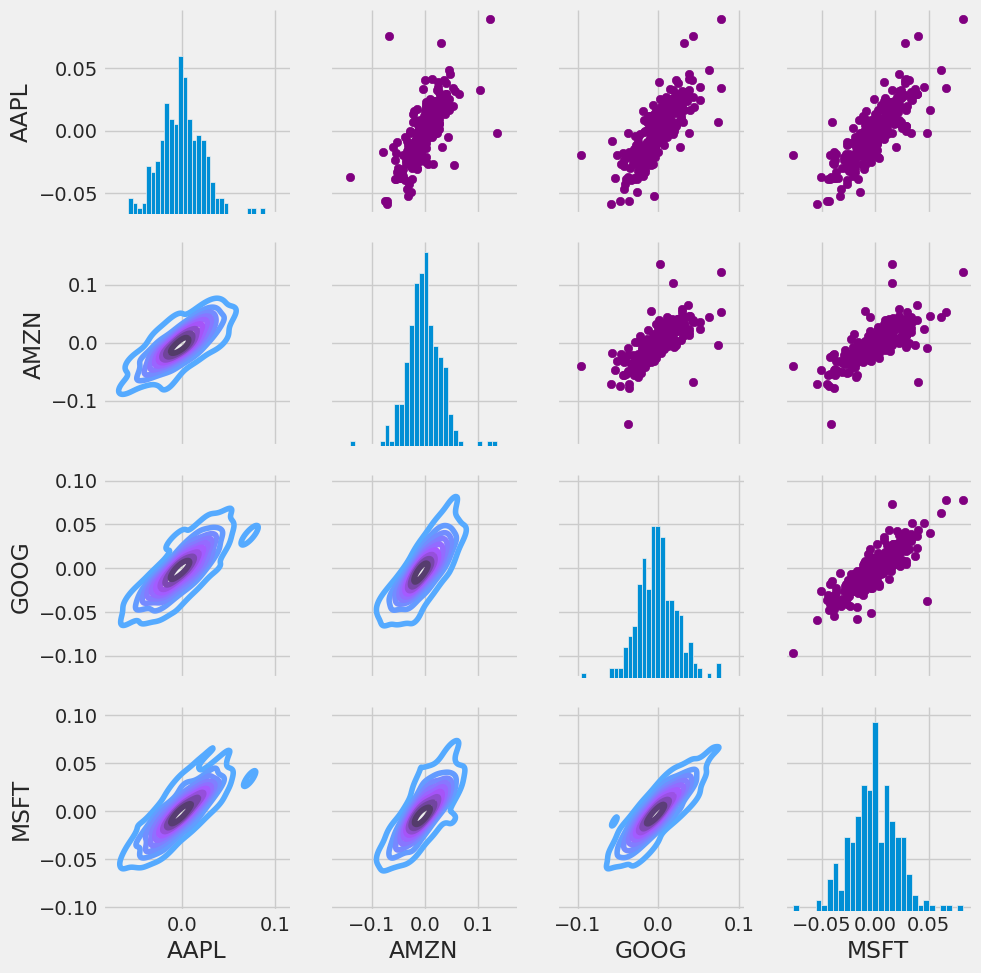

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

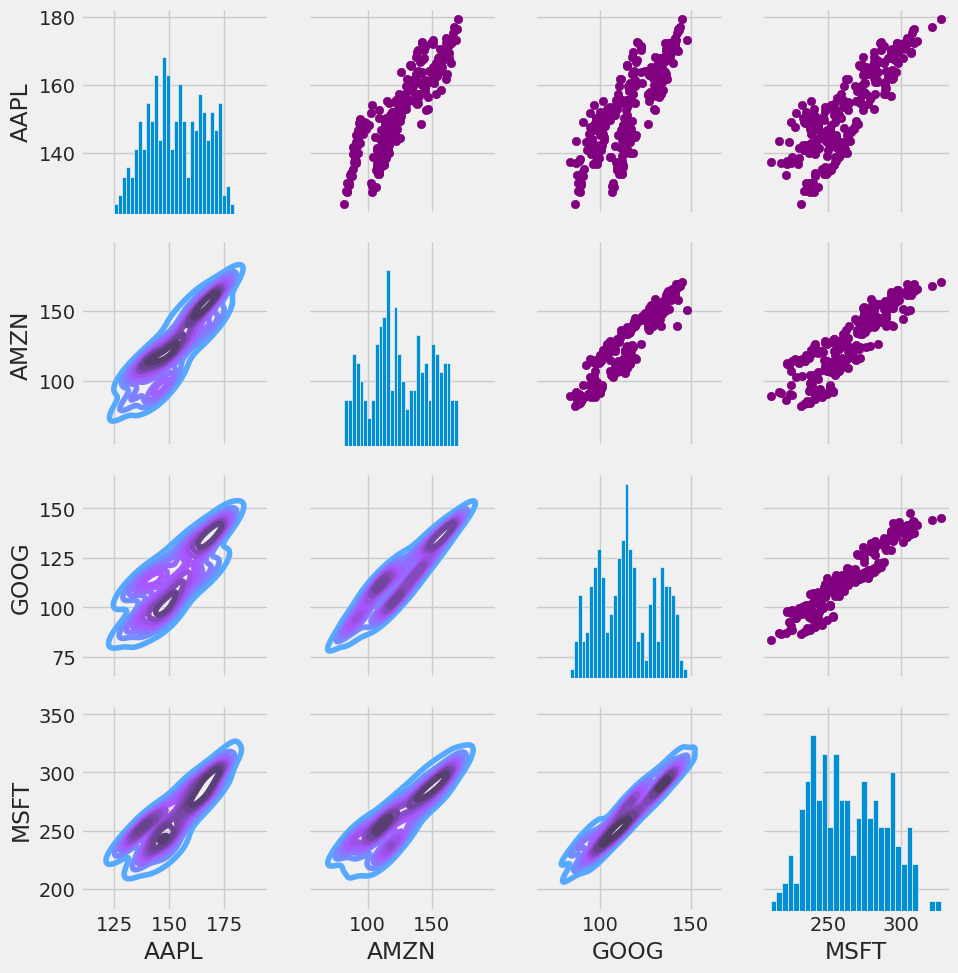

In [48]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

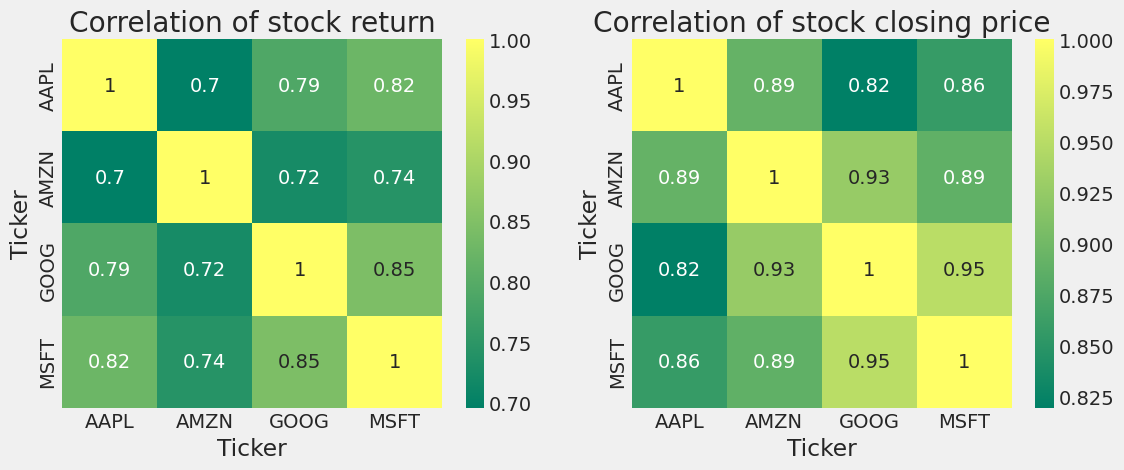

In [49]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

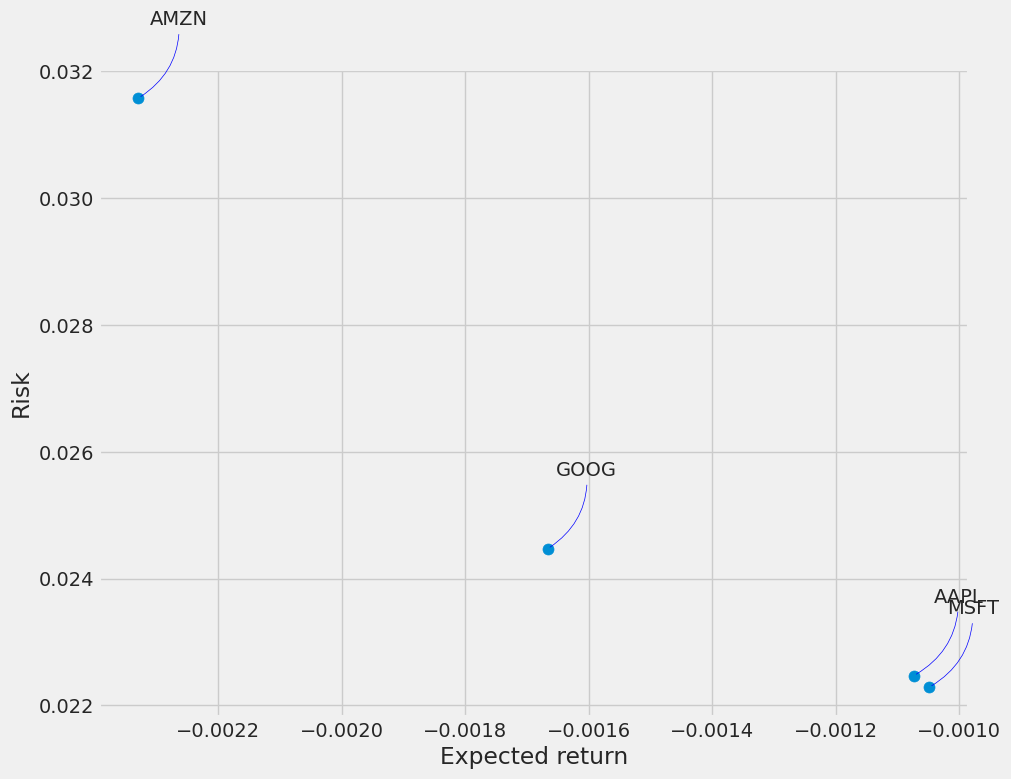

In [50]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [53]:
!pip install pandas_datareader
!pip install yfinance

import pandas_datareader.data as pdr
import yfinance as yf
from datetime import datetime

# Get the stock quote directly using yfinance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469281,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719304,394024400
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


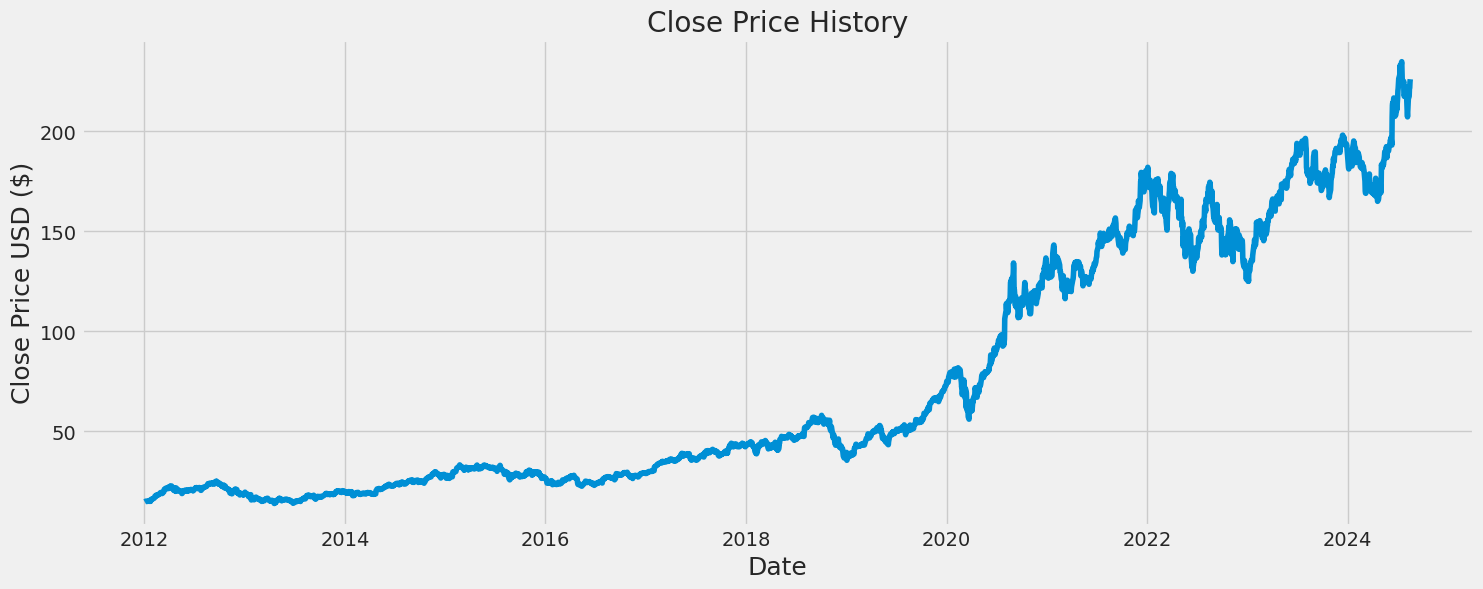

In [54]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3018

In [56]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.94068974],
       [0.95427223],
       [0.96029382]])

In [57]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2958/2958 ━━━━━━━━━━━━━━━━━━━━ 195s 65ms/step - loss: 0.0016


In [59]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step


6.241648936290657

<ipython-input-60-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


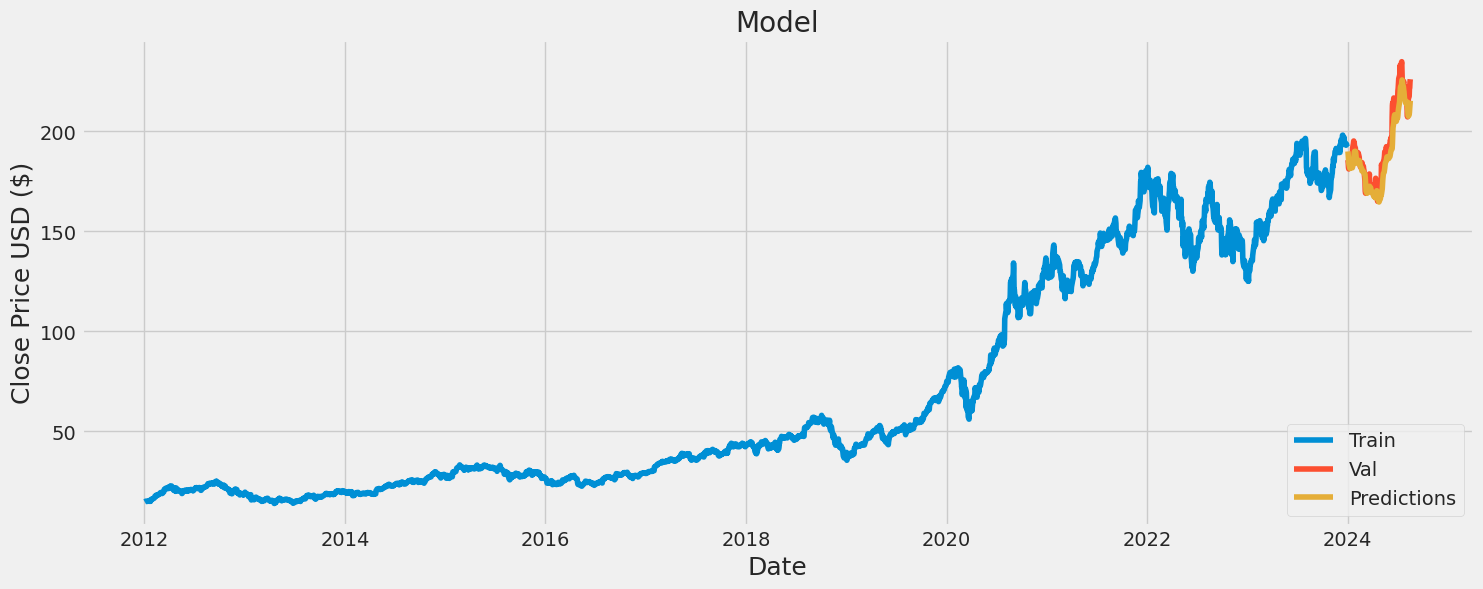

In [60]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-01-02,185.639999,189.950897
2024-01-03,184.250000,188.293076
2024-01-04,181.910004,186.254761
2024-01-05,181.179993,184.030441
2024-01-08,185.559998,182.077072
...,...,...
2024-08-12,217.529999,208.266525
2024-08-13,221.270004,209.531967
2024-08-14,221.720001,211.475296
